# Using a machine learning model to make predictions

In this notebook, we will be using the machine learning model which was trained already. We will be reading in the machine learning model which was saved to disk, and will use it to run predictions on a test set of data. This is data which the machine learning model has not seen before. 

In order to get the machine learning model to work on the data correctly, we need to process the testing data in exactly the same way in which the training data was processed. Therefore, this notebook looks fairly similar to the training notebook, however, we do not need to go through the trouble of visualising the data.

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Import the dataset. Note that this is the **Automobile Prices Testing.csv** file.

In [171]:
df=pd.read_csv(r"Automobile prices Testing.csv")

Have a look at the first 10 rows of data to get a feel for it. 

In [172]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
1,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.00,86,5800,27,33,7895
2,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.60,84,4800,26,32,8845
3,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7299
4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692
5,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998
6,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.00,100,5500,26,32,9995
7,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.50,73,4500,30,33,10698
8,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.00,95,4150,25,25,13860


Have a look at the data types.

In [173]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

We can see that some columns we expect to be numeric are given as objects. This is due to there being '?' in some of the unknown fields. In order to carry out a data science, we need the columns to be of the correct data types. Therefore, we will replace the '?' character with blanks for numeric columns, and with '' for object columns.

In [174]:
df.replace(to_replace = '?',value = np.nan,inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,37,41,5572
1,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.00,86,5800,27,33,7895
2,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.60,84,4800,26,32,8845
3,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7299
4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,31,38,6692
5,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998
6,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.00,100,5500,26,32,9995
7,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.50,73,4500,30,33,10698
8,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.70,3.52,21.00,95,4150,25,25,13860


We have replaced the '?' with Nulls. We will now be able to select the columns which need to be converted to a numeric data type, and change them.

In [175]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'],errors = 'coerce')


We can now check the data types again.

In [176]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

We can see that the data types are now correct. All of the columns we expect to see as nunmeric are numeric.

We can now obtain the summary statistics for the dataframe, using the **.describe()** function.

In [177]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.888889,123.875000,99.333333,173.877778,65.688889,53.822222,2407.000000,116.777778,3.228889,3.371111,12.067778,89.333333,5127.777778,28.000000,32.777778,9650.444444
std,1.166667,39.660839,6.542362,12.114741,1.720788,2.520306,515.816586,27.806374,0.223408,0.119525,5.514603,29.393877,540.318836,5.024938,5.607535,3425.522409
min,-1.000000,65.000000,93.700000,157.300000,63.800000,50.800000,1876.000000,90.000000,2.970000,3.230000,8.600000,68.000000,4150.000000,19.000000,24.000000,5572.000000
25%,0.000000,103.000000,94.500000,167.300000,63.800000,52.000000,1989.000000,97.000000,3.150000,3.290000,9.300000,69.000000,4800.000000,26.000000,32.000000,7299.000000
50%,1.000000,123.000000,97.300000,171.700000,65.500000,53.700000,2300.000000,110.000000,3.190000,3.350000,9.400000,84.000000,5200.000000,27.000000,33.000000,8845.000000
75%,1.000000,135.250000,102.400000,177.800000,66.500000,54.900000,2480.000000,122.000000,3.270000,3.400000,10.000000,95.000000,5500.000000,31.000000,37.000000,10698.000000
max,3.000000,197.000000,114.200000,198.900000,68.400000,58.700000,3430.000000,171.000000,3.700000,3.580000,22.500000,161.000000,5800.000000,37.000000,41.000000,15998.000000


<AxesSubplot:>

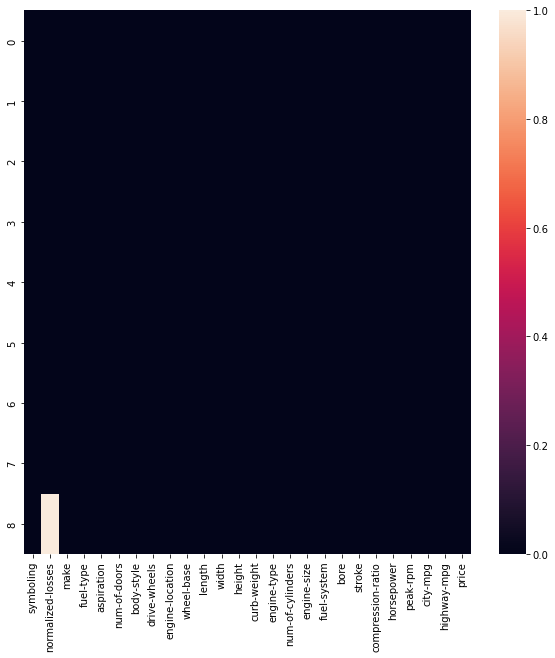

In [178]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())

Everywhere the heatmap is black indicates a non-null value. The light coloured areas indicate nulls. The nulls are fairly sparse. With this in mind, we can decide how we want to deal with the nulls.

## Dealing with nulls

In [179]:
df.drop(['normalized-losses'] , axis = 1 , inplace = True)

In order to linearise the price column, we will take the natural logarithm of this column. 

In [180]:
df['price'] = df['price'].apply(np.log)

## Normalising data

In [181]:
from sklearn import preprocessing

for col in df.drop('price', axis = 1):
    if df[col].dtype in ['float64', 'int64']:
        x = df[[col]].values.astype(float)
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df[[col]] = x_scaled

When dealing with data, ensuring the data types are corect is vitally important. If you consider the non-numerical data types, you will realise that they are actually categorical types. Therefore, we will convert the data in these columns to the categorical data type.

In [182]:
categorical = df.select_dtypes(include = ['object']).columns
categorical

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [183]:
df[categorical] = df[categorical].apply(pd.Categorical)

Check the data types to see if it is correct.

In [184]:
df.dtypes

symboling             float64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight           float64
engine-type          category
num-of-cylinders     category
engine-size           float64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg              float64
highway-mpg           float64
price                 float64
dtype: object

In [185]:
df[categorical].describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,9,9,9,9,9,9,9,9,9,9
unique,8,2,2,2,3,2,1,3,2,4
top,toyota,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
freq,2,7,7,5,4,7,9,7,8,4


## Machine Learning

Now that we have visualised and cleaned our data, and ensured that there are no nulls, we will apply a machine learning model to it to see if we can determine the price. We will be using the **scikit-learn** package to carry out the machine learning. As price is a continuous variable, this is an example of a regression problem; we would like to determine a particular value. Import the package we will require.

In [186]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as tts

In [187]:
x = df.drop('price', axis = 1)
y = df['price']

## Feature encoding

Let us get a list of categorical variables in our dataframe.

In [188]:
categorical_features = df.select_dtypes(include = ['category']).columns
categorical_features

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [189]:
num_df=pd.read_csv(r"num_df.csv")
num_df

,num-of-doors,num-of-cylinders
0,zero,zero
1,one,one
2,two,two
3,three,three
4,four,four
5,five,five
6,six,six
7,seven,seven
8,eight,eight
9,nine,nine


In [190]:
for key in dict(num_df).keys():
    d = {value:key for key, value in dict(num_df[key]).items()}
    df[key].replace(d, inplace = True)
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.50,dodge,gas,std,2,hatchback,fwd,front,0.000000,0.000000,...,0.000000,2bbl,0.000000,0.000000,0.058273,0.000000,0.818182,1.000000,1.000000,8.625509
1,0.25,honda,gas,std,2,hatchback,fwd,front,0.136585,0.245192,...,0.246914,1bbl,0.246575,1.000000,0.028777,0.193548,1.000000,0.444444,0.529412,8.973985
2,0.50,mazda,gas,std,2,hatchback,fwd,front,0.248780,0.492788,...,0.395062,2bbl,0.575342,0.457143,0.000000,0.172043,0.393939,0.388889,0.470588,9.087608
3,0.50,nissan,gas,std,2,sedan,fwd,front,0.039024,0.192308,...,0.086420,2bbl,0.246575,0.171429,0.057554,0.010753,0.636364,0.666667,0.764706,8.895493
4,0.50,plymouth,gas,std,4,sedan,fwd,front,0.000000,0.240385,...,0.000000,2bbl,0.000000,0.000000,0.057554,0.000000,0.818182,0.666667,0.823529,8.808668
5,1.00,toyota,gas,std,2,hatchback,rwd,front,0.448780,0.629808,...,1.000000,mpfi,0.410959,0.342857,0.050360,1.000000,0.636364,0.000000,0.000000,9.680219
6,0.75,volkswagen,gas,std,4,sedan,fwd,front,0.175610,0.346154,...,0.234568,mpfi,0.301370,0.485714,0.100719,0.344086,0.818182,0.388889,0.470588,9.209840
7,0.00,toyota,diesel,turbo,4,sedan,fwd,front,0.424390,0.439904,...,0.246914,idi,0.410959,0.342857,1.000000,0.053763,0.212121,0.611111,0.529412,9.277812
8,0.25,peugot,diesel,turbo,4,wagon,rwd,front,1.000000,1.000000,...,0.765432,idi,1.000000,0.828571,0.892086,0.290323,0.000000,0.333333,0.058824,9.536762


In [191]:
cat_df=pd.read_csv(r"cat_df.csv")
cat_df

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,dodge,diesel,std,hatchback,fwd,front,dohc,1bbl
1,honda,gas,turbo,sedan,rwd,NaN,l,2bbl
2,mazda,NaN,NaN,wagon,NaN,NaN,ohc,idi
3,nissan,NaN,NaN,NaN,NaN,NaN,NaN,mpfi
4,peugot,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,plymouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,volkswagen,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
for key in dict(cat_df).keys():
    e = {value:key for key, value in dict(cat_df[key]).items()}
    df[key].replace(e, inplace = True)

In [193]:
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.50,0,1,0,2,0,0,0,0.000000,0.000000,...,0.000000,1,0.000000,0.000000,0.058273,0.000000,0.818182,1.000000,1.000000,8.625509
1,0.25,1,1,0,2,0,0,0,0.136585,0.245192,...,0.246914,0,0.246575,1.000000,0.028777,0.193548,1.000000,0.444444,0.529412,8.973985
2,0.50,2,1,0,2,0,0,0,0.248780,0.492788,...,0.395062,1,0.575342,0.457143,0.000000,0.172043,0.393939,0.388889,0.470588,9.087608
3,0.50,3,1,0,2,1,0,0,0.039024,0.192308,...,0.086420,1,0.246575,0.171429,0.057554,0.010753,0.636364,0.666667,0.764706,8.895493
4,0.50,5,1,0,4,1,0,0,0.000000,0.240385,...,0.000000,1,0.000000,0.000000,0.057554,0.000000,0.818182,0.666667,0.823529,8.808668
5,1.00,6,1,0,2,0,1,0,0.448780,0.629808,...,1.000000,3,0.410959,0.342857,0.050360,1.000000,0.636364,0.000000,0.000000,9.680219
6,0.75,7,1,0,4,1,0,0,0.175610,0.346154,...,0.234568,3,0.301370,0.485714,0.100719,0.344086,0.818182,0.388889,0.470588,9.209840
7,0.00,6,0,1,4,1,0,0,0.424390,0.439904,...,0.246914,2,0.410959,0.342857,1.000000,0.053763,0.212121,0.611111,0.529412,9.277812
8,0.25,4,0,1,4,2,1,0,1.000000,1.000000,...,0.765432,2,1.000000,0.828571,0.892086,0.290323,0.000000,0.333333,0.058824,9.536762


In [194]:
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as tts

In [195]:
import pandas as pd
import pickle
from io import StringIO
from io import BytesIO
import codecs

In [196]:
import pickle
model = pickle.load(open(r"pickle", 'rb'))
print(model)

LinearRegression()


In [197]:
x = df.drop('price', axis = 1)
y = df['price']


In [198]:
x

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.50,0,1,0,2,0,0,0,0.000000,0.000000,...,4,0.000000,1,0.000000,0.000000,0.058273,0.000000,0.818182,1.000000,1.000000
1,0.25,1,1,0,2,0,0,0,0.136585,0.245192,...,4,0.246914,0,0.246575,1.000000,0.028777,0.193548,1.000000,0.444444,0.529412
2,0.50,2,1,0,2,0,0,0,0.248780,0.492788,...,4,0.395062,1,0.575342,0.457143,0.000000,0.172043,0.393939,0.388889,0.470588
3,0.50,3,1,0,2,1,0,0,0.039024,0.192308,...,4,0.086420,1,0.246575,0.171429,0.057554,0.010753,0.636364,0.666667,0.764706
4,0.50,5,1,0,4,1,0,0,0.000000,0.240385,...,4,0.000000,1,0.000000,0.000000,0.057554,0.000000,0.818182,0.666667,0.823529
5,1.00,6,1,0,2,0,1,0,0.448780,0.629808,...,6,1.000000,3,0.410959,0.342857,0.050360,1.000000,0.636364,0.000000,0.000000
6,0.75,7,1,0,4,1,0,0,0.175610,0.346154,...,4,0.234568,3,0.301370,0.485714,0.100719,0.344086,0.818182,0.388889,0.470588
7,0.00,6,0,1,4,1,0,0,0.424390,0.439904,...,4,0.246914,2,0.410959,0.342857,1.000000,0.053763,0.212121,0.611111,0.529412
8,0.25,4,0,1,4,2,1,0,1.000000,1.000000,...,4,0.765432,2,1.000000,0.828571,0.892086,0.290323,0.000000,0.333333,0.058824


In [199]:
pred = model.predict(x)

In [200]:
pred

array([8.62550933, 8.97398493, 9.08760761, 8.89549263, 9.01709409,
       9.68021899, 9.33904656, 9.27781209, 9.3603285 ])

In [201]:
y

0    8.625509
1    8.973985
2    9.087608
3    8.895493
4    8.808668
5    9.680219
6    9.209840
7    9.277812
8    9.536762
Name: price, dtype: float64

In [202]:
model.score(x, y)

0.9023601260721048

In [203]:
from sklearn import metrics

In [204]:
MAE = metrics.mean_absolute_error(np.exp(y), np.exp(pred))
MSE = metrics.mean_squared_error(np.exp(y), np.exp(pred))
R2 = metrics.r2_score(np.exp(y), np.exp(pred))

print(f'Mean Absolute Error = ', np.round(MAE, 2))
print(f'Mean Squared Error = ', np.round(np.sqrt(MSE), 2))
print(f'R-Squared Value = ', np.round(R2, 4))

Mean Absolute Error =  574.57
Mean Squared Error =  1018.22
R-Squared Value =  0.9006


In [205]:
x = x.reset_index().drop('index', axis = 1)
y_df = pd.DataFrame(y).reset_index().drop('index', axis = 1)
pred_df = pd.DataFrame(pred, columns = ['prediction'])
results_df = pd.concat([x, y_df, pred_df], axis = 1)
results_df[['price', 'prediction']] = results_df[['price', 'prediction']].apply(np.exp)

In [206]:
results_df['diff'] = results_df['price'] - results_df['prediction']
results_df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prediction,diff
0,0.50,0,1,0,2,0,0,0,0.000000,0.000000,...,0.000000,0.000000,0.058273,0.000000,0.818182,1.000000,1.000000,5572.0,5572.000000,1.000444e-11
1,0.25,1,1,0,2,0,0,0,0.136585,0.245192,...,0.246575,1.000000,0.028777,0.193548,1.000000,0.444444,0.529412,7895.0,7895.000000,1.455192e-11
2,0.50,2,1,0,2,0,0,0,0.248780,0.492788,...,0.575342,0.457143,0.000000,0.172043,0.393939,0.388889,0.470588,8845.0,8845.000000,1.637090e-11
3,0.50,3,1,0,2,1,0,0,0.039024,0.192308,...,0.246575,0.171429,0.057554,0.010753,0.636364,0.666667,0.764706,7299.0,7299.000000,1.273293e-11
4,0.50,5,1,0,4,1,0,0,0.000000,0.240385,...,0.000000,0.000000,0.057554,0.000000,0.818182,0.666667,0.823529,6692.0,8242.789404,-1.550789e+03
5,1.00,6,1,0,2,0,1,0,0.448780,0.629808,...,0.410959,0.342857,0.050360,1.000000,0.636364,0.000000,0.000000,15998.0,15998.000000,2.910383e-11
6,0.75,7,1,0,4,1,0,0,0.175610,0.346154,...,0.301370,0.485714,0.100719,0.344086,0.818182,0.388889,0.470588,9995.0,11373.559101,-1.378559e+03
7,0.00,6,0,1,4,1,0,0,0.424390,0.439904,...,0.410959,0.342857,1.000000,0.053763,0.212121,0.611111,0.529412,10698.0,10698.000000,2.000888e-11
8,0.25,4,0,1,4,2,1,0,1.000000,1.000000,...,1.000000,0.828571,0.892086,0.290323,0.000000,0.333333,0.058824,13860.0,11618.204526,2.241795e+03
